<center><h1>Ataques de Corazón<h1></center>
<img src=https://img.webmd.com/dtmcms/live/webmd/consumer_assets/site_images/articles/health_tools/did_you_know_this_could_lead_to_heart_disease_slideshow/493ss_thinkstock_rf_heart_illustration.jpg />

# Diccionario de datos


   <table> 
   <tr>
       <td><strong>Variable</strong></td>
       <td><strong>Definition</strong></td>
       <td><strong>Key</strong></td>
   </tr>
   <tr>
       <td>age</td>
       <td>Edad de la persona en años</td>
       <td></td>
   </tr>
   <tr>
       <td>sex</td>
       <td>Sexo de la persona</td>
       <td>(1 = masculino , 0 = femenino)</td>
   </tr>
   <tr>
       <td>chest_pain</td>
       <td>Tipo de dolor de pecho ocasionado por una disminución de la irrigación sanguínea al corazón </td>
       <td>(1 = típico, 2= atípico, 3= dolor no producido por angina  ,4= sin síntomas </td>
   </tr>
   <tr>
       <td>blood_pressure</td>
       <td>Presión sanguínea de la persona en resposo (mmHg)</td>
       <td></td>
   </tr>
   <tr>
       <td>cholesterol</td>
       <td>Colesterol de la persona en mg/dl</td>
       <td></td>
   </tr>
   <tr>
       <td>blood_sugar</td>
       <td>Azúcar en sangre de la persona </td>
       <td>Supera 120 mg/dl (1 = true; 0 = false)</td>
   </tr>
   <tr>
       <td>result_ecg</td>
       <td>Resultado de electrocardiograma en reposo</td>
       <td>(0 = normal, 1 = anormalidad de onda , 2 = probable hipertrofia ventricular)</td>
   </tr>
   <tr>
       <td>max_heart_rate</td>
       <td>Mayor pulso registrado</td>
       <td></td>
   </tr>
   <tr>
       <td>exercise_angina</td>
       <td>Angina inducida por el ejercicio</td>
       <td>(1 = true, 0 = false)</td>
   </tr>
   <tr>
       <td>st_depression</td>
       <td>Depresión ST inducida por el ejercicio en relación con el descanso</td>
       <td></td>
   </tr>
   <tr>
       <td>st_slope</td>
       <td>La pendiente del segmento pico del ejercicio ST</td>
       <td>(1 = creciente, 2= plana, 3= decreciente)</td>
   </tr>
   <tr>
       <td>c_major_vassels</td>
       <td>Número de vasos principales</td>
       <td>(0-3)</td>
   </tr>
   <tr>
       <td>target (Variable salida)</td>
       <td>Diagnóstico de enfermedad cardíaca</td>
       <td>(0 = Valor 0: menos de 50% de diámetro de estrechamiento, 1 = mas de 50% de diámetro de estrechamiento.)</td>
   </tr>
   </table>


In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
full = pd.read_csv("./heart.csv")

#Borramos la columna referida a thalassemia, explicacion debajo.

#Cambiamos el nombre de las columnas para que queden igual que en el diccionario de datos.
full.columns = ['age', 'sex', 'chest_pain', 'blood_pressure', 'cholesterol', 'blood_sugar', 'result_ecg', 'max_heart_rate',
       'exercise_angina', 'st_depression', 'st_slope', 'c_major_vessels','thalassemia' ,'target']

full.head(10)

,age,sex,chest_pain,blood_pressure,cholesterol,blood_sugar,result_ecg,max_heart_rate,exercise_angina,st_depression,st_slope,c_major_vessels,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [3]:
#Dividimos en el conjunto de train y test el dataset en un porcentaje de 30% test y el restante en train.
#train, test = train_test_split(dt, test_size=0.3)


In [4]:
full.describe()

,age,sex,chest_pain,blood_pressure,cholesterol,blood_sugar,result_ecg,max_heart_rate,exercise_angina,st_depression,st_slope,c_major_vessels,thalassemia,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Graficamos valores atípicos

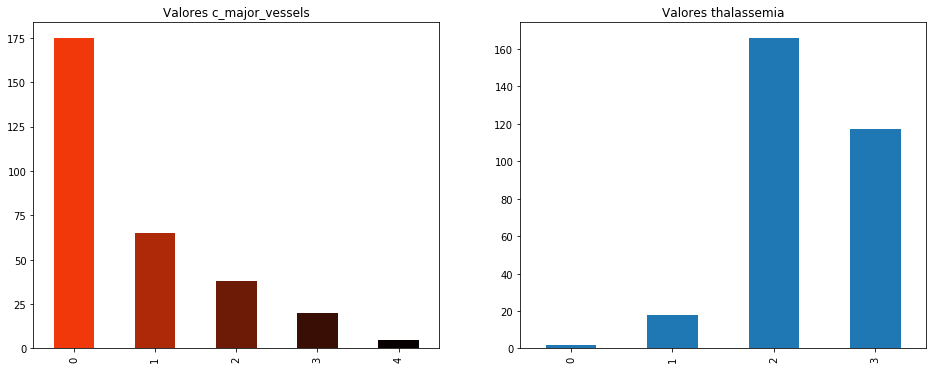

In [5]:
f,ax=plt.subplots(1,2,figsize=(16,6))
ax[0].set_title('Valores c_major_vessels')
full.c_major_vessels.value_counts().sort_index().plot.bar(ax=ax[0],color=["#F1380A","#AE2908","#6D1B07","#390E04","#060100"])

ax[1].set_title('Valores thalassemia')
full.thalassemia.value_counts().sort_index().plot.bar(ax=ax[1])

### Eliminamos los valores atípicos

Eliminamos los 5 valores valores que no eran coincidentes con la descripción del dataset.


In [6]:
full = full[full.c_major_vessels != 4]

full = full[full.thalassemia != 0]

### Comprobamos si existen valores nulos

In [7]:
full.isnull().sum()

age                0
sex                0
chest_pain         0
blood_pressure     0
cholesterol        0
blood_sugar        0
result_ecg         0
max_heart_rate     0
exercise_angina    0
st_depression      0
st_slope           0
c_major_vessels    0
thalassemia        0
target             0
dtype: int64

In [8]:
full.describe()

,age,sex,chest_pain,blood_pressure,cholesterol,blood_sugar,result_ecg,max_heart_rate,exercise_angina,st_depression,st_slope,c_major_vessels,thalassemia,target
count,296.000000,296.000000,296.000000,296.00000,296.000000,296.00000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000
mean,54.523649,0.679054,0.959459,131.60473,247.155405,0.14527,0.523649,149.560811,0.327703,1.059122,1.395270,0.679054,2.327703,0.540541
std,9.059471,0.467631,1.034184,17.72662,51.977011,0.35297,0.526692,22.970792,0.470171,1.166474,0.618235,0.939726,0.585743,0.499198
min,29.000000,0.000000,0.000000,94.00000,126.000000,0.00000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,0.000000,120.00000,211.000000,0.00000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.00000,242.500000,0.00000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.00000,275.250000,0.00000,1.000000,166.000000,1.000000,1.650000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.00000,564.000000,1.00000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,3.000000,1.000000


In [9]:
full['sex'][full['sex'] == 1] = 'male'
full['sex'][full['sex'] == 0] = 'female'

full['chest_pain'][full['chest_pain'] == 0] = 'typical_angina'
full['chest_pain'][full['chest_pain'] == 1] = 'atypical_angina'
full['chest_pain'][full['chest_pain'] == 2] = 'non-anginal_pain'
full['chest_pain'][full['chest_pain'] == 3] = 'asymptomatic'

full['thalassemia'][full['thalassemia'] == 1] = 'normal'
full['thalassemia'][full['thalassemia'] == 2] = 'fixed_defect'
full['thalassemia'][full['thalassemia'] == 3] = 'reversable_defect'

In [10]:
full.head()

,age,sex,chest_pain,blood_pressure,cholesterol,blood_sugar,result_ecg,max_heart_rate,exercise_angina,st_depression,st_slope,c_major_vessels,thalassemia,target
0,63,male,asymptomatic,145,233,1,0,150,0,2.3,0,0,normal,1
1,37,male,non-anginal_pain,130,250,0,1,187,0,3.5,0,0,fixed_defect,1
2,41,female,atypical_angina,130,204,0,0,172,0,1.4,2,0,fixed_defect,1
3,56,male,atypical_angina,120,236,0,1,178,0,0.8,2,0,fixed_defect,1
4,57,female,typical_angina,120,354,0,1,163,1,0.6,2,0,fixed_defect,1


### Definimos las columna sex, chest_pain, thalassemia como objeto para poder hacer el one-hot encoder

In [11]:
full['sex'] = full['sex'].astype('object')
full['chest_pain'] = full['chest_pain'].astype('object')
full['thalassemia'] = full['thalassemia'].astype('object')

### Generamos el one-hot encoder

In [12]:
full = pd.get_dummies(full)

In [13]:
full.head()

,age,blood_pressure,cholesterol,blood_sugar,result_ecg,max_heart_rate,exercise_angina,st_depression,st_slope,c_major_vessels,target,sex_female,sex_male,chest_pain_asymptomatic,chest_pain_atypical_angina,chest_pain_non-anginal_pain,chest_pain_typical_angina,thalassemia_fixed_defect,thalassemia_normal,thalassemia_reversable_defect
0,63,145,233,1,0,150,0,2.3,0,0,1,0,1,1,0,0,0,0,1,0
1,37,130,250,0,1,187,0,3.5,0,0,1,0,1,0,0,1,0,1,0,0
2,41,130,204,0,0,172,0,1.4,2,0,1,1,0,0,1,0,0,1,0,0
3,56,120,236,0,1,178,0,0.8,2,0,1,0,1,0,1,0,0,1,0,0
4,57,120,354,0,1,163,1,0.6,2,0,1,1,0,0,0,0,1,1,0,0


<strong> Variables de entrada:</strong> 
<li>age</li> 
<li>sex_female</li>
<li>sex_male</li>
<li>chest_pain_asymptomatic</li>
<li>chest_pain_atypical_angina</li>
<li>chest_pain_non-anginal_pain	</li>
<li>chest_pain_typical_angina</li>
<li>thalassemia_fixed_defect</li>
<li>thalassemia_normal</li>
<li>thalassemia_reversable_defect</li>
<li>blood_pressure</li>
<li>cholesterol</li>
<li>blood_sugar</li>
<li>result_ecg</li>
<li>max_heart_rate</li>
<li>exercise_angina</li>
<li>st_depression</li>
<li>st_slope</li>
<li>c_major_vassels</li>

<strong> Variables de salida: </strong> <li> target <strong> | Valores ( 0 si no posee enfermedad, 1 si posee) </strong> </li> 

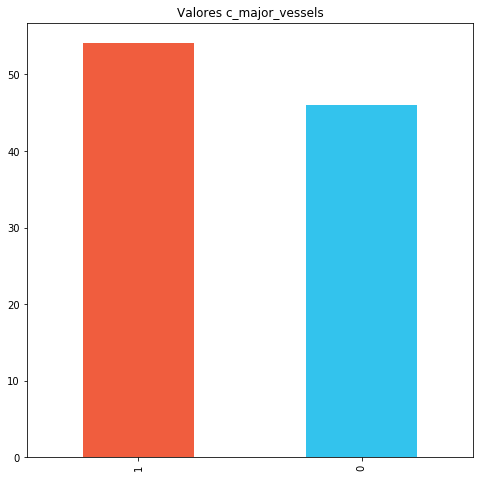

In [15]:
f,ax=plt.subplots(1,1,figsize=(8,8))
ax.set_title('Valores c_major_vessels')


(full.target.value_counts() / full.shape[0] * 100 ).plot.bar(ax=ax,color=["#F05D3E","#33C3ED"])


#(train[(train.sex == 'female') & (train.survived == True)].has_children.value_counts().sort_index() / train[train.sex == 'female'].has_children.value_counts().sort_index()).plot.bar(ax=ax[2])